In [1]:
# Importing required module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings('ignore');

In [2]:
# Reading Data
cards = pd.read_csv("D:\Ravi_Data\credit card.csv",sep=",")
cards.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


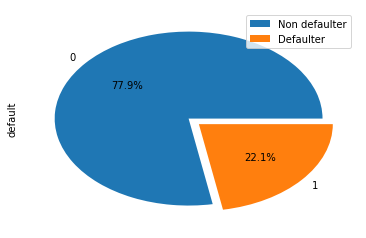

In [3]:
cards["default"].value_counts().plot(kind = 'pie',autopct = '%1.1f%%',explode = [0, 0.1])
plt.legend(["Non defaulter", "Defaulter"])
plt.show()

In [4]:
# sns.pairplot(cards, hue='default') 
# plt.show()

In [5]:
cards.describe().round(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,...,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,15000.5,167484.3,1.6,1.9,1.6,35.5,-0.0,-0.1,-0.2,-0.2,...,43262.9,40311.4,38871.8,5663.6,5921.2,5225.7,4826.1,4799.4,5215.5,0.2
std,8660.4,129747.7,0.5,0.8,0.5,9.2,1.1,1.2,1.2,1.2,...,64332.9,60797.2,59554.1,16563.3,23040.9,17607.0,15666.2,15278.3,17777.5,0.4
min,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,...,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7500.8,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,...,2326.8,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.5,117.8,0.0
50%,15000.5,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,19052.0,18104.5,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,22500.2,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,...,54506.0,50190.5,49198.2,5006.0,5000.0,4505.0,4013.2,4031.5,4000.0,0.0
max,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,...,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


In [6]:
print("Columns before processing :" ,cards.shape[1])
cards['SEX'] = cards['SEX'].apply(lambda x: x if x == 1 else 0)
cards['MARRIAGE'] = cards['MARRIAGE'].apply(lambda x: x if x == 1 else 0)
eduDF = pd.get_dummies(cards['EDUCATION'],prefix ='EDU',prefix_sep ='_', drop_first = True)

age_bins = [15, 25, 30,35,40, 45,50,55,60, np.inf]
bins_name = ['upto25', '25_30','30_35','35_40','40_45','45_50','50_55','55_60','60+']
cards['AGE'] = pd.cut(cards['AGE'], age_bins, labels= bins_name)
ageDF = pd.get_dummies(cards['AGE'],prefix ='AGE',prefix_sep ='_', drop_first = True)

cards = pd.concat([cards,eduDF,ageDF],axis =1)
cards.drop(['ID','EDUCATION','AGE'],axis =1,inplace = True)
print("Columns after processing :", cards.shape[1])
cards

Columns before processing : 25
Columns after processing : 36


,LIMIT_BAL,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_5,EDU_6,AGE_25_30,AGE_30_35,AGE_35_40,AGE_40_45,AGE_45_50,AGE_50_55,AGE_55_60,AGE_60+
0,20000,0,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,0,-1,2,0,0,0,2,2682,...,0,0,1,0,0,0,0,0,0,0
2,90000,0,0,0,0,0,0,0,0,29239,...,0,0,0,1,0,0,0,0,0,0
3,50000,0,1,0,0,0,0,0,0,46990,...,0,0,0,0,1,0,0,0,0,0
4,50000,1,1,-1,0,-1,0,0,0,8617,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,1,0,0,0,0,0,0,188948,...,0,0,0,0,1,0,0,0,0,0
29996,150000,1,0,-1,-1,-1,-1,0,0,1683,...,0,0,0,0,0,1,0,0,0,0
29997,30000,1,0,4,3,2,-1,0,0,3565,...,0,0,0,0,1,0,0,0,0,0
29998,80000,1,1,1,-1,0,0,0,-1,-1645,...,0,0,0,0,0,1,0,0,0,0


In [7]:
def fisherScore(df, target):
    fisher_score = []
    y = np.unique(df[target])
    df_col = df.columns.tolist()
    df_col.remove(target)
    for col in df_col:
        abs_mean_diff = abs(df[df[target] == y[0]][col].mean() - df[df[target] == y[1]][col].mean())
        sqrt_var = np.sqrt(df[df[target] == y[0]][col].var() + df[df[target] == y[1]][col].var())
        fisher = abs_mean_diff / sqrt_var
        fisher_score.append(fisher.round(3))
        
    scoreDF = pd.DataFrame({'Column Name':df_col,'Fisher Score':fisher_score}).sort_values('Fisher Score', ascending = False)
    return scoreDF

In [8]:
# Creating Fisher score
result = fisherScore(df=cards,target="default")

fisher_col = result["Column Name"].head(30).tolist() + ['default']
cards_fisher= cards[fisher_col]

In [9]:
print('Before under sampling :\n',cards_fisher['default'].value_counts())

# dealing with imbalance of deafault and Non default observation by Under sampling
# Number of Defaults in train set = 4645
# Number Non defaults in train set = 16355 , reduscing it to 6636
## Under sampling by making default / non deafult  = 50/50 %

non_default_index = cards_fisher.index[cards_fisher['default']==0].tolist()

from random import sample
delete_index = sample(non_default_index,500)

cards_fisher.drop(delete_index,inplace = True)

X = cards_fisher.drop('default',axis=1) 
y = cards_fisher['default']
print("--------------------\n -------------------")
print('After sampling :\n',cards_fisher['default'].value_counts())

Before under sampling :
 0    23364
1     6636
Name: default, dtype: int64
--------------------
 -------------------
After sampling :
 0    22864
1     6636
Name: default, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state= 111,stratify=y)
number_features = X_train.shape[1]

In [11]:
# Assign the values outlined to the inputs
from tpot import TPOTClassifier

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=5, population_size=3,offspring_size=4,
                          scoring='accuracy',verbosity=2, random_state=111, cv=4)

# Fit the classifier to the training data
tpot_clf.fit(X_train,y_train)

# Score on the test set
print(tpot_clf.score(X_test,y_test))

HBox(children=(FloatProgress(value=0.0, description='Optimization Progress', max=23.0, style=ProgressStyle(description_width='initial')), HTML(value='')))


Generation 1 - Current best internal CV score: 0.7989344727253789
Generation 2 - Current best internal CV score: 0.8114283539112346
Generation 3 - Current best internal CV score: 0.8158838224144723
Generation 4 - Current best internal CV score: 0.8162711753368659
Generation 5 - Current best internal CV score: 0.8181113409176236
Best pipeline: GradientBoostingClassifier(VarianceThreshold(input_matrix, threshold=0.005), learning_rate=1.0, max_depth=1, max_features=0.4, min_samples_leaf=3, min_samples_split=13, n_estimators=100, subsample=0.7500000000000001)
0.8129943502824859


In [12]:
import xgboost as xgb

xg_model = xgb.XGBClassifier(objective='binary:logistic',n_estimators=800, seed=111)
xg_model.fit(X_train, y_train)
preds = xg_model.predict(X_test)

score = xg_model.score(X_test,y_test)
print('Score : ', score)

Score :  0.8009039548022598


In [13]:
# from sklearn.model_selection import RandomizedSearchCV

# # Instantiate the regressor: gbm
# gbm = xgb.XGBClassifier()

# gbm_param = {'learning_rate': np.linspace(0.2,2,10),
#              'n_estimators': [200,400,600,800]}

# randomized_model = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param,scoring='roc_auc', cv=3, n_iter = 20)

# randomized_model.fit(X,y)



# rand_x = list(randomized_model.cv_results_['param_n_estimators'])
# rand_y = list(randomized_model.cv_results_['param_learning_rate'])

# x_lims = [200,800]
# y_lims = [0.2,2]

# # Plot grid results    
# plt.scatter(rand_y, rand_x, c=['blue']*10)
# plt.gca().set(xlabel= 'learning rate', ylabel='Number of estimators',title='Random Search Hyperparameters')
# plt.show()


#randomized_model.best_score_

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 633
Trainable params: 601
Non-trainable params: 32
_________________________________________________________________
None


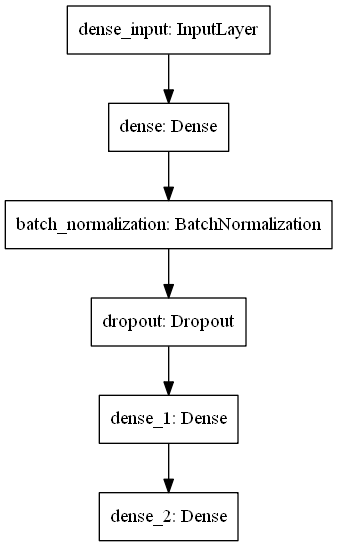

In [14]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(16, input_shape=(number_features,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# relu,softmax, tanh
# adam , RMSprop,sgd

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of your model
print(model.summary())


# Visualizing Model
from keras.utils import plot_model
import graphviz

# # Plot the model
plot_model(model, to_file='D:\Ravi_Data\model.png')

# # # # Display the image
# data = plt.imread('D:\Ravi_Data\model.png')
# plt.imshow(data)
# plt.show()

In [15]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
early_stop = EarlyStopping(patience=3)
checkpoint = ModelCheckpoint('D:\Ravi_Data\Cardweights.hdf5', monitor='val_accuracy', save_best_only = True)

details = model.fit(X_train,y_train, epochs = 300,validation_split = 0.2, callbacks = [early_stop,checkpoint],
                    verbose = False, batch_size =200)

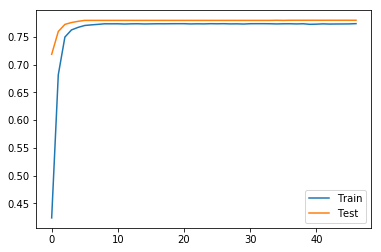

89/89 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7748
Accuracy: 0.7748022675514221


In [16]:
plt.plot(details.history['accuracy'])
plt.plot(details.history['val_accuracy'])       
plt.legend(['Train','Test'])
plt.show()

model.load_weights('D:\Ravi_Data\Cardweights.hdf5')
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_test,y_test,batch_size =100)[1]

# Print accuracy
print('Accuracy:', accuracy)